In [7]:
import numpy as np
import torch
from torchvision.datasets import mnist
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

from torch.nn import Module
from torch import nn


class Lenet5(Module):
    def __init__(self):
        super(Lenet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.relu1 = nn.ReLU()
        #subsampling size = 2
        self.pool1 = nn.MaxPool2d(" ")
        self.conv2 = nn.Conv2d(" ", 16, " ") # Lenet-5 Uses 5x5 Kernel
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(" ")
        self.fc1 = nn.Linear(" ", 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(" ", 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(" ", " ")
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        return y

In [20]:
batch_size = 256
train_dataset = mnist.MNIST(root='./train', download=True, train=True, transform=ToTensor())
test_dataset = mnist.MNIST(root='./test', download=True, train=False, transform=ToTensor())
train_loader = DataLoader(train_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
model = Lenet5()
sgd = SGD(model.parameters(), lr=1e-2, momentum = 0.0)
loss_fn = CrossEntropyLoss()
epoch = 8
step_loss = []
train_step = []

for current_epoch in range(epoch):
    model.train()
    for idx, (train_x, train_label) in enumerate(train_loader):
        sgd.zero_grad()
        predict_y = model(train_x.float())
        loss = loss_fn(predict_y, train_label.long())
        if idx % 10 == 0:
            print('idx: {}, loss: {}'.format(idx, loss.sum().item()))
            step_loss.append(loss.sum().item())
            train_step.append(idx + 230*(current_epoch))
            #print(step_loss)
            #print(train_step)
        loss.backward()
        sgd.step()

    all_correct_num = 0
    all_sample_num = 0
    model.eval()
    for idx, (test_x, test_label) in enumerate(test_loader):
        predict_y = model(test_x.float()).detach()
        predict_y = np.argmax(predict_y, axis=-1)
        current_correct_num = predict_y == test_label
        all_correct_num += np.sum(current_correct_num.numpy(), axis=-1)
        all_sample_num += current_correct_num.shape[0]
    acc = all_correct_num / all_sample_num
    print('accuracy: {:.2f}'.format(acc))
    torch.save(model, './mnist_{:.2f}.pth'.format(acc))

idx: 0, loss: 2.303069591522217
idx: 10, loss: 2.302210807800293
idx: 20, loss: 2.3039424419403076
idx: 30, loss: 2.302713394165039
idx: 40, loss: 2.3023931980133057
idx: 50, loss: 2.302907943725586
idx: 60, loss: 2.301645278930664
idx: 70, loss: 2.303222417831421
idx: 80, loss: 2.303032875061035
idx: 90, loss: 2.3009443283081055
idx: 100, loss: 2.299924612045288
idx: 110, loss: 2.3010940551757812
idx: 120, loss: 2.303436279296875
idx: 130, loss: 2.296663522720337
idx: 140, loss: 2.3010828495025635
idx: 150, loss: 2.298919439315796
idx: 160, loss: 2.3018016815185547
idx: 170, loss: 2.2998247146606445
idx: 180, loss: 2.2970407009124756
idx: 190, loss: 2.3002898693084717
idx: 200, loss: 2.2994465827941895
idx: 210, loss: 2.2986018657684326
idx: 220, loss: 2.2972450256347656
idx: 230, loss: 2.297003984451294
accuracy: 0.19


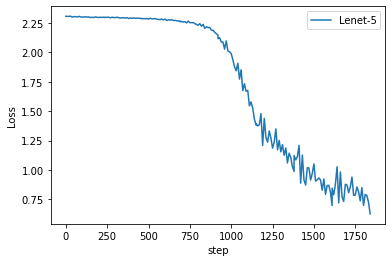

In [13]:
# you can see the train_loss graph in this code.
import matplotlib.pyplot as plt

plt.plot(train_step, step_loss, label='Lenet-5')
plt.xlabel('step')
plt.ylabel('Loss')
plt.legend()
plt.show()

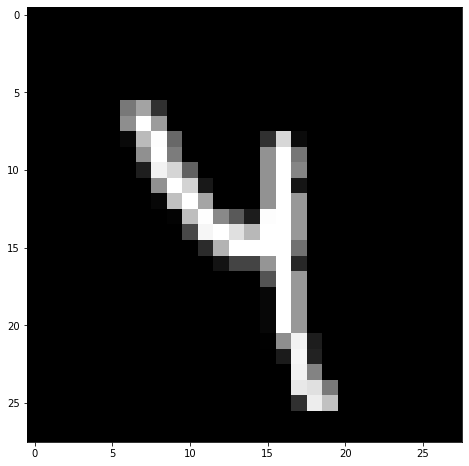

In [16]:
# You can see the Test data with this code
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))

sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
img, label = test_dataset[sample_idx]

plt.imshow(img.squeeze(), cmap="gray")